In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings

from sklearn.cluster import KMeans

In [13]:
warnings.filterwarnings('ignore') 

df = pd.read_csv("Mall_Customers.csv")

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Text(0.5, 1.0, 'Distribution of Annual Income (k$)')

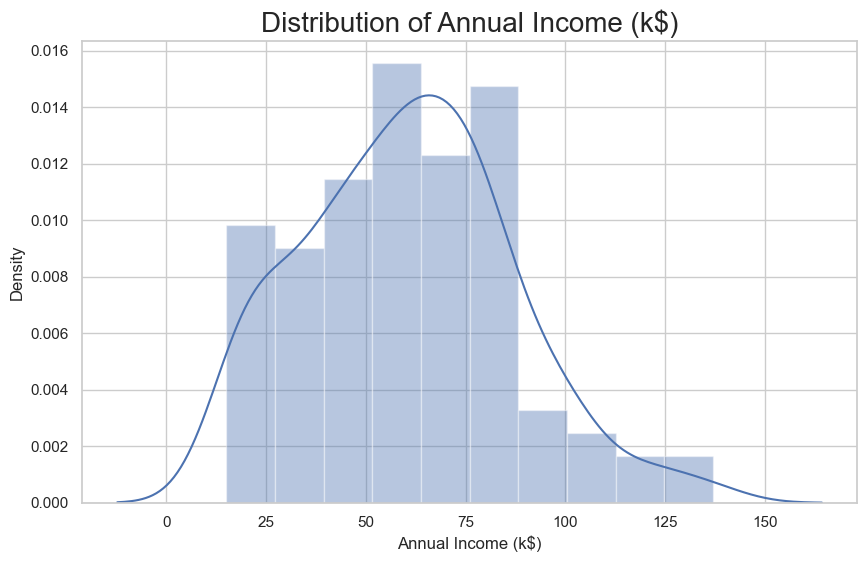

In [25]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)

In [26]:
df1=df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [27]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0.5, 1.0, 'Spending Score (1-100) vs Annual Income (k$)')

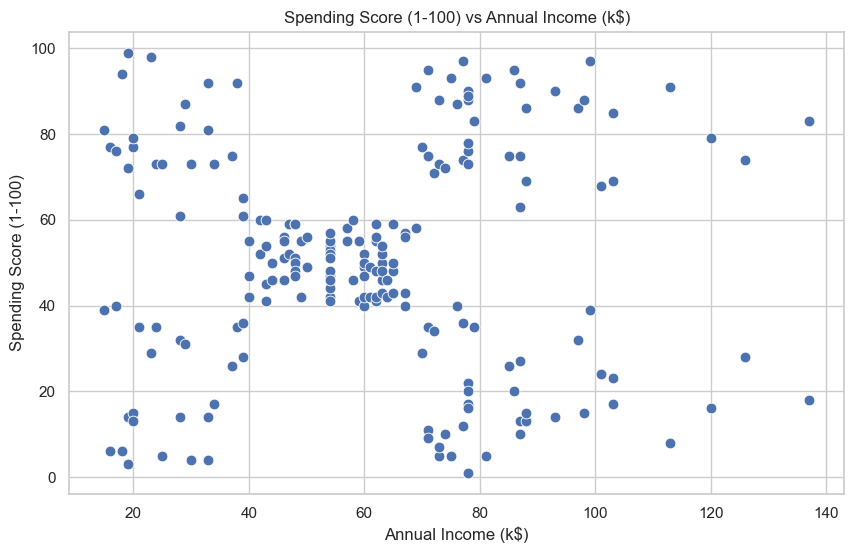

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.title('Spending Score (1-100) vs Annual Income (k$)')

In [30]:
a = []
for i in range(1,11):
    kmeans = KMeans(i, random_state=42)
    kmeans.fit(X)
    a.append(kmeans.inertia_)

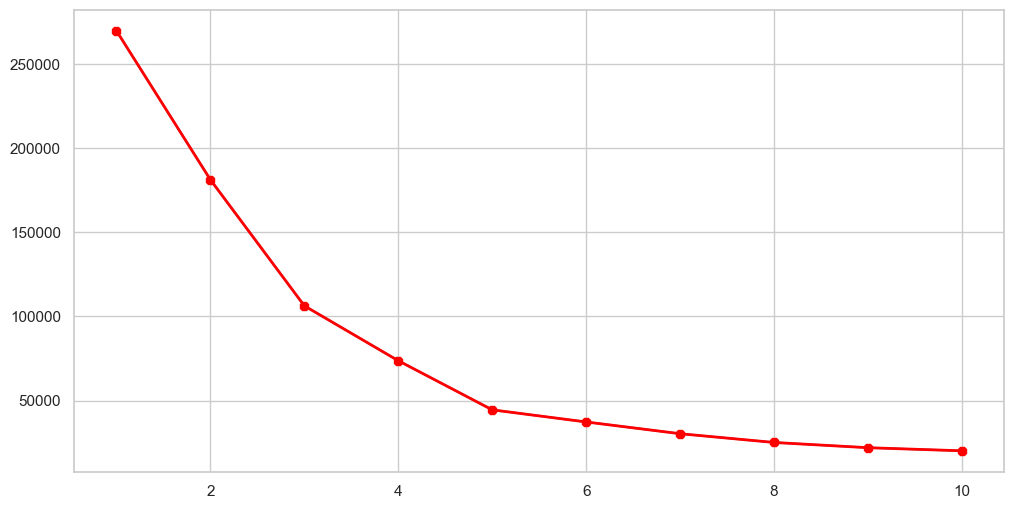

In [35]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),a)
plt.plot(range(1,11),a, linewidth=2, color="red", marker ="8")

In [36]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [37]:
df1["label"] = y_pred

In [38]:
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

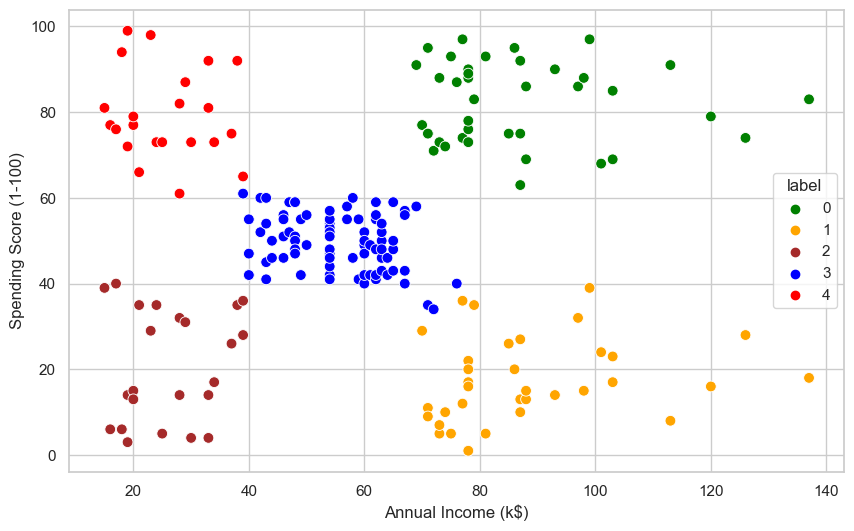

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label", palette=['green','orange','brown','blue','red'],data = df1, s = 60 )